In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow.keras

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Luis_Fonsi_Despacito_translated_comments.csv", on_bad_lines='skip', encoding='utf-8', engine='python')

In [4]:
df

,row_number,original_comment,translated_comment
0,2,8.5 md😮,85 md 😮
1,3,My also check out guys 😭😭,My also check out guys 😭😭
2,4,Soy el 53M 😮🎉,I am the 53M 😮🎉
3,7,Bluds views is the popularity of earth😭🙏,Bluds views is the popularity of earth 😭🙏
4,10,🇮🇶⁦༼⁠ ⁠つ⁠ ⁠◕⁠‿⁠◕⁠ ⁠༽⁠つ⁩,one 🇮🇶
...,...,...,...
34117,49454,منو يسمعها ب2024😂,Who will listen to it in 2024? 😂
34118,49456,Anyone Indian ❤ -------,Anyone Indian
34119,49458,I am from India still love this song and I don...,I am from India still love this song and I don...
34120,49461,ㄹㅈㄷ,ㄹㅈㄷ


In [5]:
mapping=pd.read_csv("Mapping2.csv")

In [6]:
mapping

,Unnamed: 0,emoji,label
0,0,❤,0
1,1,🇧,1
2,2,🇮,2
3,3,🎉,3
4,4,🎧,4
5,5,🎵,5
6,6,🎶,6
7,7,👀,7
8,8,👇,8
9,9,👌,9


In [7]:
import re
def remove_emojis_and_check(comment):
    # Ensure the comment is a string (handle NaN, None, or non-string values)
    if not isinstance(comment, str):
        return None
    
    # Remove any emoji using a general emoji pattern
    # This regex matches all emojis
    emoji_pattern = re.compile(r'[\U0001F600-\U0001F64F'  # Emoticons
                               r'\U0001F300-\U0001F5FF'  # Symbols & Pictographs
                               r'\U0001F680-\U0001F6FF'  # Transport & Map Symbols
                               r'\U0001F700-\U0001F77F'  # Alchemical Symbols
                               r'\U0001F780-\U0001F7FF'  # Geometric Shapes Extended
                               r'\U0001F800-\U0001F8FF'  # Supplemental Arrows-C
                               r'\U0001F900-\U0001F9FF'  # Supplemental Symbols and Pictographs
                               r'\U0001FA00-\U0001FA6F'  # Chess Symbols
                               r'\U0001FA70-\U0001FAFF'  # Symbols and Pictographs Extended-A
                               r'\U00002702-\U000027B0'  # Miscellaneous Symbols
                               r'\U000024C2-\U0001F251'  # Enclosed characters
                               r']', flags=re.UNICODE)

    # Remove emojis from the comment
    cleaned_comment = re.sub(emoji_pattern, '', comment)

    # If the cleaned comment is empty or just spaces, return None to drop the row
    if not cleaned_comment.strip():
        return None
    
    return cleaned_comment

In [8]:
df['translated_comment'] = df['translated_comment'].apply(remove_emojis_and_check)

In [9]:
df

,row_number,original_comment,translated_comment
0,2,8.5 md😮,85 md
1,3,My also check out guys 😭😭,My also check out guys
2,4,Soy el 53M 😮🎉,I am the 53M
3,7,Bluds views is the popularity of earth😭🙏,Bluds views is the popularity of earth
4,10,🇮🇶⁦༼⁠ ⁠つ⁠ ⁠◕⁠‿⁠◕⁠ ⁠༽⁠つ⁩,one
...,...,...,...
34117,49454,منو يسمعها ب2024😂,Who will listen to it in 2024?
34118,49456,Anyone Indian ❤ -------,Anyone Indian
34119,49458,I am from India still love this song and I don...,I am from India still love this song and I don...
34120,49461,ㄹㅈㄷ,None


In [10]:
df = df.dropna(subset=['translated_comment'])
df

,row_number,original_comment,translated_comment
0,2,8.5 md😮,85 md
1,3,My also check out guys 😭😭,My also check out guys
2,4,Soy el 53M 😮🎉,I am the 53M
3,7,Bluds views is the popularity of earth😭🙏,Bluds views is the popularity of earth
4,10,🇮🇶⁦༼⁠ ⁠つ⁠ ⁠◕⁠‿⁠◕⁠ ⁠༽⁠つ⁩,one
...,...,...,...
34115,49450,Its march 2024 .. Any one listening this maste...,Its march 2024 Any one listening this masterp...
34117,49454,منو يسمعها ب2024😂,Who will listen to it in 2024?
34118,49456,Anyone Indian ❤ -------,Anyone Indian
34119,49458,I am from India still love this song and I don...,I am from India still love this song and I don...


In [11]:
import string
def tweet_clean(tweet):
    tweet = str(tweet).lower()
    # remove @mentions
    rm_mention = re.sub(r'@[A-Za-z0-9]+', '', tweet) 
    
    # remove RT
    rm_rt = re.sub(r'RT[/s]+', '', rm_mention) 
    
    # remove hyperlinks
    rm_links = re.sub(r'http\S+', '', rm_rt)                               
    rm_links = re.sub(r'https?:\/\/\S+','', rm_links)
    
    # remove numbers
    rm_nums = re.sub('[0-9]+', '', rm_links)         
    
    # remove punctuations
    rm_punc = [char for char in rm_nums if char not in string.punctuation] # remove punctuations
    rm_punc = ''.join(rm_punc)
    cleaned = rm_punc
    
    return cleaned

In [12]:
df["translated_comment"] = df["translated_comment"].apply(tweet_clean)
df

,row_number,original_comment,translated_comment
0,2,8.5 md😮,md
1,3,My also check out guys 😭😭,my also check out guys
2,4,Soy el 53M 😮🎉,i am the m
3,7,Bluds views is the popularity of earth😭🙏,bluds views is the popularity of earth
4,10,🇮🇶⁦༼⁠ ⁠つ⁠ ⁠◕⁠‿⁠◕⁠ ⁠༽⁠つ⁩,one
...,...,...,...
34115,49450,Its march 2024 .. Any one listening this maste...,its march any one listening this masterpiece
34117,49454,منو يسمعها ب2024😂,who will listen to it in
34118,49456,Anyone Indian ❤ -------,anyone indian
34119,49458,I am from India still love this song and I don...,i am from india still love this song and i don...


In [13]:
df = df.dropna(subset=['translated_comment'])
df

,row_number,original_comment,translated_comment
0,2,8.5 md😮,md
1,3,My also check out guys 😭😭,my also check out guys
2,4,Soy el 53M 😮🎉,i am the m
3,7,Bluds views is the popularity of earth😭🙏,bluds views is the popularity of earth
4,10,🇮🇶⁦༼⁠ ⁠つ⁠ ⁠◕⁠‿⁠◕⁠ ⁠༽⁠つ⁩,one
...,...,...,...
34115,49450,Its march 2024 .. Any one listening this maste...,its march any one listening this masterpiece
34117,49454,منو يسمعها ب2024😂,who will listen to it in
34118,49456,Anyone Indian ❤ -------,anyone indian
34119,49458,I am from India still love this song and I don...,i am from india still love this song and i don...


In [14]:
df=df[df['translated_comment']!='']
df

,row_number,original_comment,translated_comment
0,2,8.5 md😮,md
1,3,My also check out guys 😭😭,my also check out guys
2,4,Soy el 53M 😮🎉,i am the m
3,7,Bluds views is the popularity of earth😭🙏,bluds views is the popularity of earth
4,10,🇮🇶⁦༼⁠ ⁠つ⁠ ⁠◕⁠‿⁠◕⁠ ⁠༽⁠つ⁩,one
...,...,...,...
34115,49450,Its march 2024 .. Any one listening this maste...,its march any one listening this masterpiece
34117,49454,منو يسمعها ب2024😂,who will listen to it in
34118,49456,Anyone Indian ❤ -------,anyone indian
34119,49458,I am from India still love this song and I don...,i am from india still love this song and i don...


In [15]:
df=df[df['translated_comment']!=' ']
df

,row_number,original_comment,translated_comment
0,2,8.5 md😮,md
1,3,My also check out guys 😭😭,my also check out guys
2,4,Soy el 53M 😮🎉,i am the m
3,7,Bluds views is the popularity of earth😭🙏,bluds views is the popularity of earth
4,10,🇮🇶⁦༼⁠ ⁠つ⁠ ⁠◕⁠‿⁠◕⁠ ⁠༽⁠つ⁩,one
...,...,...,...
34115,49450,Its march 2024 .. Any one listening this maste...,its march any one listening this masterpiece
34117,49454,منو يسمعها ب2024😂,who will listen to it in
34118,49456,Anyone Indian ❤ -------,anyone indian
34119,49458,I am from India still love this song and I don...,i am from india still love this song and i don...


In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

def remove_stopwords(tweet):
    # Tokenize the tweet into words
    words = word_tokenize(tweet)

    # Get the English stopwords
    stop_words = set(stopwords.words('english'))

    # Remove stopwords from the tweet
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a string
    filtered_tweet = ' '.join(filtered_words)

    return filtered_tweet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
df["translated_comment"] = df["translated_comment"].apply(remove_stopwords)
df

,row_number,original_comment,translated_comment
0,2,8.5 md😮,md
1,3,My also check out guys 😭😭,also check guys
2,4,Soy el 53M 😮🎉,
3,7,Bluds views is the popularity of earth😭🙏,bluds views popularity earth
4,10,🇮🇶⁦༼⁠ ⁠つ⁠ ⁠◕⁠‿⁠◕⁠ ⁠༽⁠つ⁩,one
...,...,...,...
34115,49450,Its march 2024 .. Any one listening this maste...,march one listening masterpiece
34117,49454,منو يسمعها ب2024😂,listen
34118,49456,Anyone Indian ❤ -------,anyone indian
34119,49458,I am from India still love this song and I don...,india still love song dont know meaning song


In [18]:
X = df["translated_comment"].values

In [19]:
X = X.reshape(-1,)
X.shape

(14194,)

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=80000)
tokenizer.fit_on_texts(X)

In [21]:
print("Text \n",X[:10],'\n')

X_seqs = tokenizer.texts_to_sequences(X)
print("Sequences")
X_seqs[:10]

Text 
 ['md' 'also check guys' '' 'bluds views popularity earth' 'one'
 'girl shows ass bit something' 'love call back yr need cable'
 'whole world saw ts' 'someone' 'beyonce'] 

Sequences


[[478],
 [158, 49, 113],
 [],
 [2146, 3, 915, 62],
 [14],
 [190, 916, 917, 628, 383],
 [5, 565, 68, 629, 349, 2147],
 [66, 11, 119, 2148],
 [9],
 [2149]]

In [22]:
idx2words = tokenizer.index_word

print("Word Mappings\n")
for i in range(100,110):
    print("Index: ",i, "---->",idx2words[i])

Word Mappings

Index:  100 ----> number
Index:  101 ----> baby
Index:  102 ----> want
Index:  103 ----> memories
Index:  104 ----> th
Index:  105 ----> listens
Index:  106 ----> top
Index:  107 ----> interview
Index:  108 ----> legend
Index:  109 ----> legends


In [23]:
vocab_size = len(tokenizer.index_word)
print("Vocabulary size :",len(tokenizer.index_word))

Vocabulary size : 5997


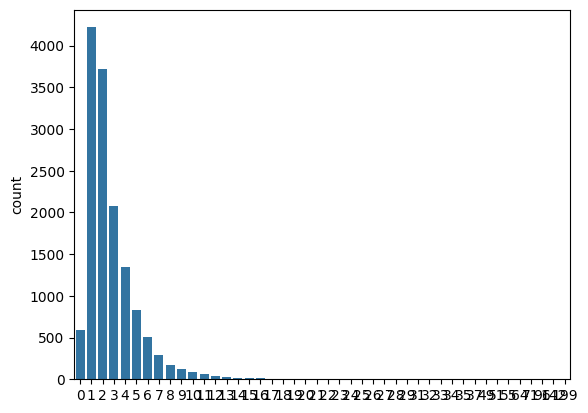

In [24]:
lens = [len(seq) for seq in X_seqs]
sns.countplot(x=lens)
plt.show()

In [25]:
from tensorflow.keras.utils import pad_sequences

max_len=40
X_seqs_pd = pad_sequences(X_seqs, truncating="pre", padding="pre", maxlen=max_len)

In [26]:
print("Before Padding")
print(X_seqs[:1])

print("\nAfter Padding")
print(X_seqs_pd[:1])

Before Padding
[[478]]

After Padding
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 478]]


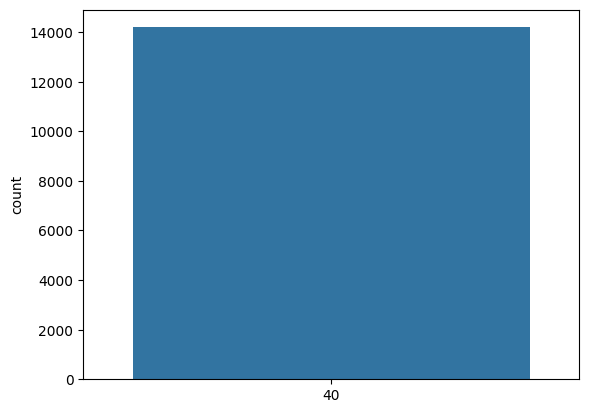

In [27]:
lens = [len(seq) for seq in X_seqs_pd]
sns.countplot(x=lens)
plt.show()

In [28]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [29]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, Bidirectional,Embedding, GlobalMaxPool1D



vocabulary_size = 21613  # Match the saved model's vocabulary size
seq_len = 40
embed_len = 128

# Rebuild the model architecture
model = Sequential()
model.add(Embedding(vocabulary_size, embed_len, input_length=seq_len))
model.add(Bidirectional(LSTM(100,return_sequences=True)))
model.add(Bidirectional(LSTM(100,return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(40, activation="softmax"))

# Build the model
model.build(input_shape=(None, seq_len))  # None for batch size

# Load weights
model.load_weights('BTP_eval.weights.h5')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 40, 128)             │       2,766,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 40, 200)             │         183,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 40, 200)             │         240,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 200)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          25,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 40)                  │           5,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,221,352 (12.29 MB)

 Trainable params: 3,221,352 (12.29 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
def sequences_to_text(sequences, tokenizer):
    return [' '.join([tokenizer.index_word.get(i, '') for i in seq if i != 0]) for seq in sequences]

# Assuming 'model' is your trained model and 'y_pred' contains the predicted class indices
# 1. Rebuild the original comments from tokenized sequences
reconstructed_comments = sequences_to_text(X_seqs_pd, tokenizer)

# 2. Get the predicted labels (e.g., if model output is class indices)
y_pred = model.predict(X_seqs_pd)
y_pred_class = np.argmax(y_pred, axis=1)  # Use this if model output is probabilities

# 3. Create a DataFrame
result_df = pd.DataFrame({
    'translated_comment': reconstructed_comments,
    'predicted_label': y_pred_class
})

444/444 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step


In [31]:
result_df

,translated_comment,predicted_label
0,md,15
1,also check guys,24
2,,0
3,bluds views popularity earth,1
4,one,12
...,...,...
14189,march one listening masterpiece,32
14190,listen,6
14191,anyone indian,36
14192,india still love song dont know meaning song,30


In [32]:
number_to_emoji = dict(zip(mapping['label'], mapping['emoji']))

# Assuming 'result_df' is your DataFrame with 'actual_label' and 'predicted_label' columns containing label numbers
result_df['predicted_label_emoji'] = result_df['predicted_label'].map(number_to_emoji)

# Display the updated DataFrame
compare_df=result_df[['translated_comment', 'predicted_label_emoji']]
compare_df

,translated_comment,predicted_label_emoji
0,md,💖
1,also check guys,😊
2,,❤
3,bluds views popularity earth,🇧
4,one,💀
...,...,...
14189,march one listening masterpiece,😮
14190,listen,🎶
14191,anyone indian,🚩
14192,india still love song dont know meaning song,😢


In [33]:
import numpy as np
from textblob import TextBlob

# Step 1: Assign sentiment values to emojis
emoji_sentiment = {
    "❤": 90, "🇧": 50, "🇮": 50, "🎉": 85, "🎧": 70, "🎵": 75,
    "🎶": 75, "👀": 50, "👇": 30, "👌": 80, "👍": 85, "👏": 88,
    "💀": 20, "💔": 10, "💕": 95, "💖": 95, "💯": 100, "🔥": 80,
    "🕊": 90, "🗿": 40, "😀": 95, "😁": 90, "😂": 85, "😅": 75,
    "😊": 80, "😌": 70, "😍": 95, "😎": 80, "😔": 40, "😘": 85,
    "😢": 30, "😭": 20, "😮": 50, "😳": 45, "🙂": 75, "🙏": 85,
    "🚩": 30, "🤣": 80, "🥰": 90, "🥺": 40
}

In [34]:
def text_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    scaled_sentiment = (polarity + 1) * 50  
    return scaled_sentiment

In [45]:
def calculate_rms(text_sentiment, emoji_sentiment):
    return np.sqrt((text_sentiment ** 2 + emoji_sentiment ** 2) / 2)

In [46]:
def process_row(row):
    text_sent_val = text_sentiment(row['translated_comment'])  # Get sentiment for text
    emoji_sent_val = emoji_sentiment.get(row['predicted_label_emoji'], None)  # Get sentiment for emoji
    if emoji_sent_val is not None:
        rms_value = calculate_rms(text_sent_val, emoji_sent_val)  # Calculate RMS
        return text_sent_val, emoji_sent_val, rms_value
    else:
        return text_sent_val, 0, 0  

In [47]:
compare_df[['text_sentiment', 'emoji_sentiment', 'rms']] = compare_df.apply(process_row, axis=1, result_type='expand')
compare_df

,translated_comment,predicted_label_emoji,text_sentiment,emoji_sentiment,rms
0,md,💖,50.0,95.0,75.911132
1,also check guys,😊,50.0,80.0,66.708320
2,,❤,50.0,90.0,72.801099
3,bluds views popularity earth,🇧,50.0,50.0,50.000000
4,one,💀,50.0,20.0,38.078866
...,...,...,...,...,...
14189,march one listening masterpiece,😮,50.0,50.0,50.000000
14190,listen,🎶,50.0,75.0,63.737744
14191,anyone indian,🚩,50.0,30.0,41.231056
14192,india still love song dont know meaning song,😢,75.0,30.0,57.118298


In [48]:
def calculate_rms_for_dataframe(df):
    squared_differences = []
    for index, row in df.iterrows():
        text_sent_val = text_sentiment(row['translated_comment'])  # Get sentiment for text
        emoji_sent_val = emoji_sentiment.get(row['predicted_label_emoji'], None)  # Get sentiment for emoji
        if emoji_sent_val is not None:
            rms_value = np.sqrt((text_sent_val ** 2 + emoji_sent_val ** 2) / 2)
            squared_differences.append(rms_value)
    
    # Calculate RMS
    rms = np.mean(squared_differences)
    return rms

In [49]:
overall_rms = calculate_rms_for_dataframe(compare_df)
overall_rms

62.225425729697896

In [50]:
rmse_df = pd.DataFrame({'Video Title': ['Luis_Fonsi_Despacito'],
                        'RMSE': [overall_rms]})
rmse_df

,Video Title,RMSE
0,Luis_Fonsi_Despacito,62.225426


In [52]:
import os

# Check if the CSV file exists
csv_filename = 'sentiment_results.csv'

# If the CSV file exists, append the new RMSE value, otherwise create a new CSV
if os.path.exists(csv_filename):
    # Append the RMSE to the existing CSV
    rmse_df.to_csv(csv_filename, mode='a', header=False, index=False)
else:
    # Create a new CSV file and write the header along with the RMSE
    rmse_df.to_csv(csv_filename, mode='w', header=True, index=False)

print(f"RMSE values have been saved to {csv_filename}")

RMSE values have been saved to sentiment_results.csv
